In [1]:
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np   # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización de datos
from sklearn.model_selection import train_test_split  # Para dividir datos en entrenamiento/prueba
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal
from sklearn import metrics  # Métricas para evaluación de modelos

In [2]:
datos = pd.read_csv('beisbol.csv')

In [3]:
print(datos.columns)

Index(['id', 'equipos', 'bateos', 'runs'], dtype='object')


In [4]:
# Exploración inicial de los datos
print("Primeras filas del dataset:")
print(datos.head())
print("\nInformación del dataset:")
print(datos.info())
print("\nEstadísticas descriptivas:")
print(datos.describe())

Primeras filas del dataset:
   id  equipos  bateos  runs
0   0    Texas    5659   855
1   1   Boston    5710   875
2   2  Detroit    5563   787
3   3   Kansas    5672   730
4   4      St.    5532   762

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       30 non-null     int64 
 1   equipos  30 non-null     object
 2   bateos   30 non-null     int64 
 3   runs     30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None

Estadísticas descriptivas:
              id       bateos        runs
count  30.000000    30.000000   30.000000
mean   14.500000  5523.500000  693.600000
std     8.803408    79.873067   82.479088
min     0.000000  5417.000000  556.000000
25%     7.250000  5448.250000  629.000000
50%    14.500000  5515.500000  705.500000
75%    21.750000  5575.000000  734.000000
max    29.000000  5710.000000

In [5]:
# Limpieza de datos - eliminar filas con valores nulos en las columnas de interés
datos = datos.dropna(subset=['bateos', 'runs'])

In [6]:
# Verificar valores nulos después de la limpieza
print("\nValores nulos por columna después de limpieza:")
print(datos.isnull().sum())  # Cuenta valores nulos por columna


Valores nulos por columna después de limpieza:
id         0
equipos    0
bateos     0
runs       0
dtype: int64


In [7]:
# Selección de características (usando 'bateos' para predecir 'runs')
X = datos['bateos'].values.reshape(-1,1)  # Variable independiente
y = datos['runs'].values.reshape(-1,1)    # Variable dependiente

In [8]:
# División en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Creación y entrenamiento del modelo
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Predicciones
y_pred = regressor.predict(X_test)

In [11]:
# Evaluación del modelo
print('\n--- Métricas de Evaluación ---')
# Error cuadrático medio (MSE) - promedio de los errores al cuadrado
print('Error cuadrático medio (MSE):', metrics.mean_squared_error(y_test, y_pred))

# Raíz del error cuadrático medio (RMSE) - error en las mismas unidades que 'runs'
print('Raíz del error cuadrático medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Coeficiente de determinación R² - proporción de varianza explicada
print('Coeficiente de determinación R²:', regressor.score(X_test, y_test))


--- Métricas de Evaluación ---
Error cuadrático medio (MSE): 5219.975632116472
Raíz del error cuadrático medio (RMSE): 72.24939883567525
Coeficiente de determinación R²: -0.5174837911123824


In [13]:
# Reentrenamiento y optimización del modelo
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [14]:
# Definir rango de valores para alpha (regularización)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [15]:
# Configurar búsqueda en cuadrícula con validación cruzada
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train.ravel())  # ravel() para convertir y_train a 1D

,estimator,Ridge()
,param_grid,"{'alpha': [0.01, 0.1, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,100


In [17]:
# Extraer mejor modelo y parámetros
best_ridge = ridge_grid.best_estimator_
best_alpha = ridge_grid.best_params_['alpha']
best_mse = -ridge_grid.best_score_

print('\n--- Reentrenamiento con Ridge ---')
print(f"Mejor valor de alpha: {best_alpha}")
print(f"Mejor MSE (validación cruzada): {best_mse:.4f}")


--- Reentrenamiento con Ridge ---
Mejor valor de alpha: 100
Mejor MSE (validación cruzada): 4352.1769


In [18]:
# Evaluar en conjunto de prueba
y_pred_ridge = best_ridge.predict(X_test)
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = best_ridge.score(X_test, y_test)

print(f"RMSE en prueba: {ridge_rmse:.4f}")
print(f"R² en prueba: {ridge_r2:.4f}")

RMSE en prueba: 72.2430
R² en prueba: -0.5172


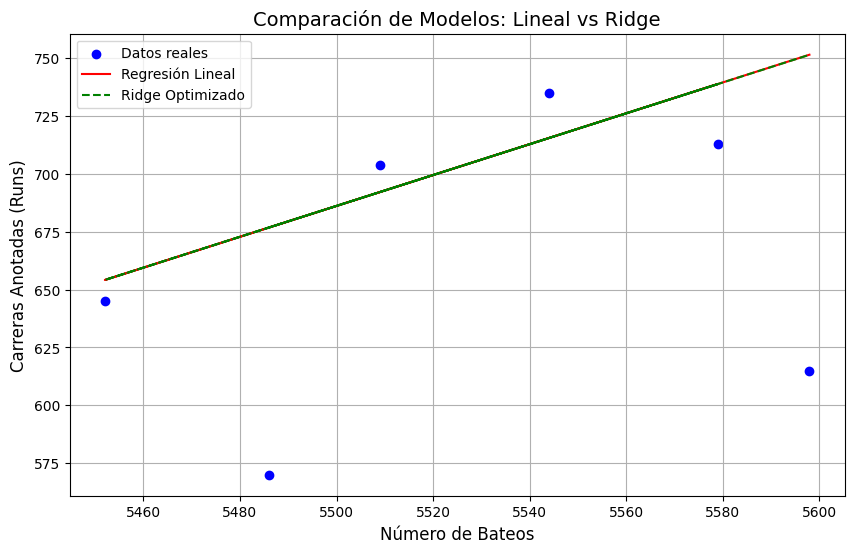

In [19]:
# Comparar gráficamente con modelo original
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Regresión Lineal')
plt.plot(X_test, y_pred_ridge, color='green', linestyle='--', label='Ridge Optimizado')
plt.title('Comparación de Modelos: Lineal vs Ridge', fontsize=14)
plt.xlabel('Número de Bateos', fontsize=12)
plt.ylabel('Carreras Anotadas (Runs)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Parámetros del modelo
print('\n--- Parámetros del Modelo ---')
# Intercepto (b) - valor de 'runs' cuando 'bateos' es cero
print('Intercepto (b):', regressor.intercept_)


--- Parámetros del Modelo ---
Intercepto (b): [-2981.51721258]


In [21]:
# Pendiente (m) - cambio esperado en 'runs' por cada unidad de 'bateos'
print('Pendiente (m):', regressor.coef_)

Pendiente (m): [[0.66685087]]


In [22]:
# Interpretación del modelo
print('\n--- Interpretación ---')
# Mostrar la ecuación del modelo con formato numérico
print(f"Ecuación del modelo: runs = {regressor.intercept_[0]:.2f} + {regressor.coef_[0][0]:.4f} * bateos")


--- Interpretación ---
Ecuación del modelo: runs = -2981.52 + 0.6669 * bateos


In [23]:
# Interpretación práctica del coeficiente
print(f"Por cada 100 bateos adicionales, se esperan {100 * regressor.coef_[0][0]:.2f} runs adicionales")

Por cada 100 bateos adicionales, se esperan 66.69 runs adicionales


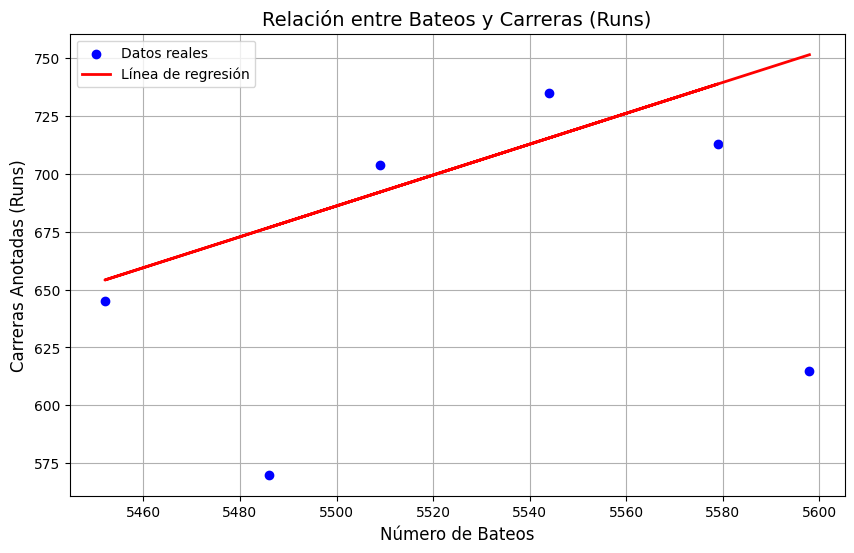

In [24]:
# Visualización de resultados
# Crear figura con tamaño específico (10x6 pulgadas)
plt.figure(figsize=(10, 6))

# Graficar datos reales (puntos azules)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')

# Graficar línea de regresión (línea roja)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')

# Configuración del gráfico
plt.title('Relación entre Bateos y Carreras (Runs)', fontsize=14)
plt.xlabel('Número de Bateos', fontsize=12)
plt.ylabel('Carreras Anotadas (Runs)', fontsize=12)
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar gráfico


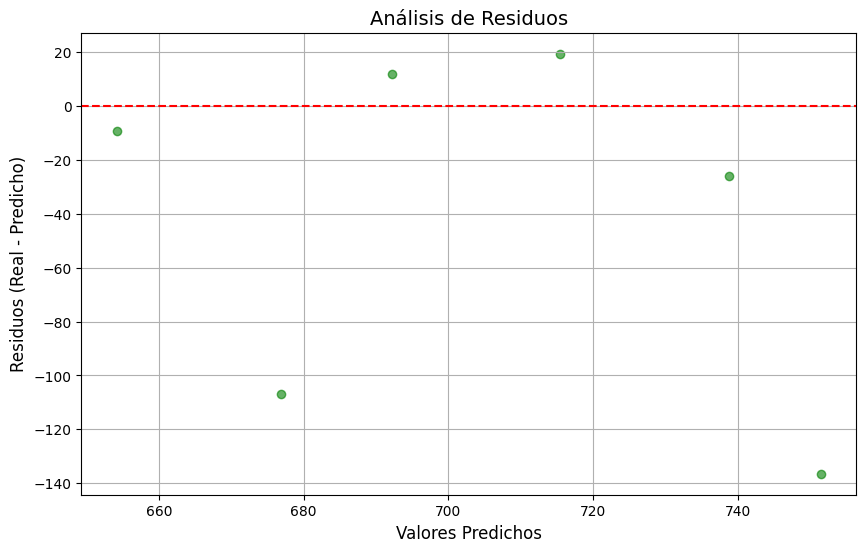

In [26]:
# Calcular residuos (diferencia entre valores reales y predichos)
residuos = y_test - y_pred

# Crear gráfico de residuos
plt.figure(figsize=(10, 6))

# Graficar residuos vs valores predichos
plt.scatter(y_pred, residuos, color='green', alpha=0.6)

# Línea horizontal en y=0 como referencia
plt.axhline(y=0, color='red', linestyle='--')

# Configuración del gráfico
plt.title('Análisis de Residuos', fontsize=14)
plt.xlabel('Valores Predichos', fontsize=12)
plt.ylabel('Residuos (Real - Predicho)', fontsize=12)
plt.grid(True)
plt.show()

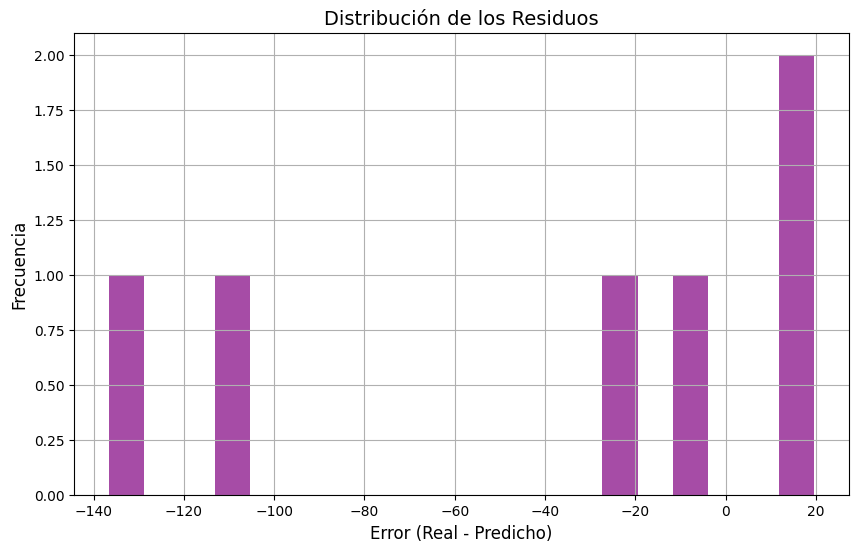

In [27]:
# Distribución de los residuos
plt.figure(figsize=(10, 6))

# Crear histograma de los residuos
plt.hist(residuos, bins=20, color='purple', alpha=0.7)

# Configuración del gráfico
plt.title('Distribución de los Residuos', fontsize=14)
plt.xlabel('Error (Real - Predicho)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()